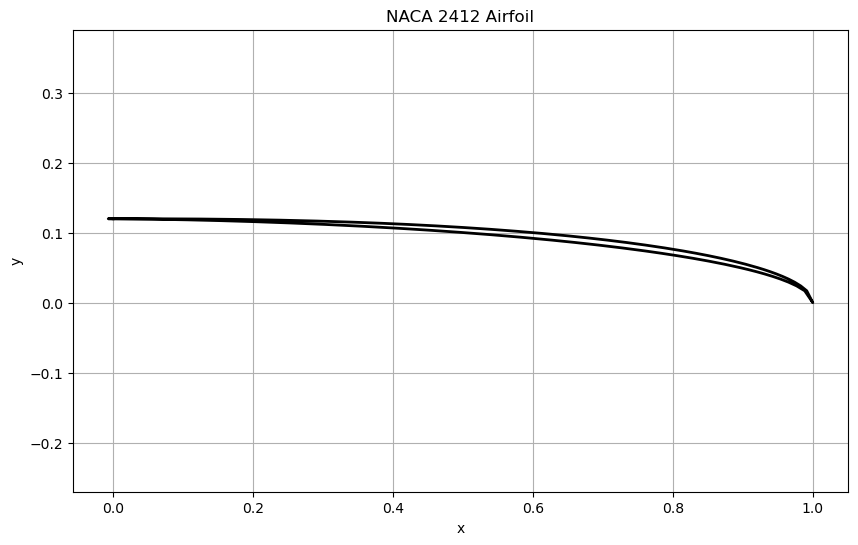

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def compute_airfoil_coordinates(c, t, num_points):
    x = np.linspace(0, c, num_points)
    yt = 5 * t * (0.2969 * np.sqrt(x / c) - 0.1260 * (x / c) - 0.3516 * (x / c)**2 + 0.2843 * (x / c)**3 - 0.1036 * (x / c)**4)
    yc = 0.12 * c * (1 - (x / c)**2)**0.5

    xu = x - yt
    yu = yc
    xl = x + yt
    yl = yc

    x_coordinates = np.concatenate((xu, xl[::-1]))
    y_coordinates = np.concatenate((yu, yl[::-1]))

    return np.column_stack((x_coordinates, y_coordinates))

# Parameters
c = 1.0   # Chord length
t = 0.12  # Maximum thickness as a fraction of the chord
num_points = 100  # Number of points along the airfoil

# Compute airfoil coordinates
airfoil_coordinates = compute_airfoil_coordinates(c, t, num_points)

# Plotting the airfoil
plt.figure(figsize=(10, 6))
plt.plot(airfoil_coordinates[:, 0], airfoil_coordinates[:, 1], 'k-', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('NACA 2412 Airfoil')
plt.axis('equal')
plt.grid(True)
plt.show()


Optimized Parameters:
Chord Length (c): 1.0
Maximum Thickness (t): 0.12
Angle of Attack (alpha): 0.0
Drag Coefficient (Cd): 4.440892098500626e-16


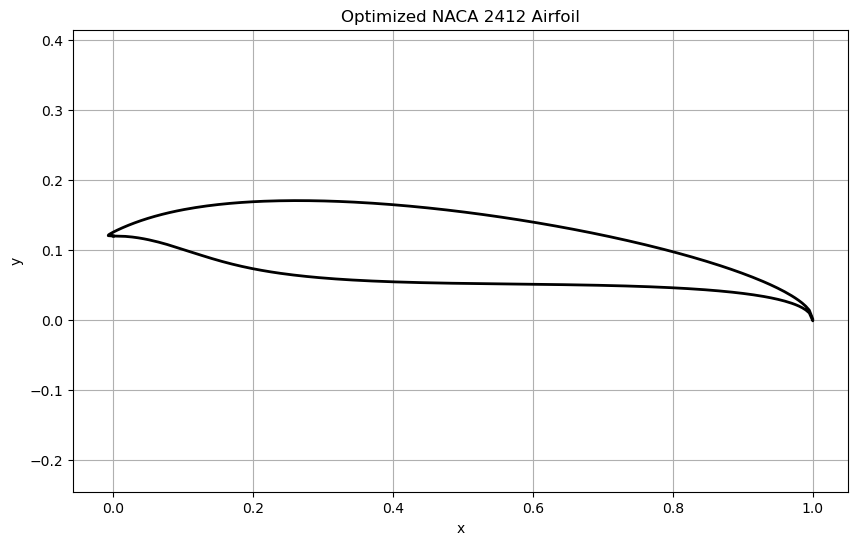

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def compute_airfoil_coordinates(c, t, num_points):
    x = np.linspace(0, c, num_points)
    yt = 5 * t * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x**2 + 0.2843 * x**3 - 0.1015 * x**4)
    yc = 0.12 * c * (1 - x**2 / c**2)**0.5

    xu = x - yt * np.sin(np.arctan2(yc, x))
    yu = yc + yt * np.cos(np.arctan2(yc, x))
    xl = x + yt * np.sin(np.arctan2(yc, x))
    yl = yc - yt * np.cos(np.arctan2(yc, x))

    x_coordinates = np.concatenate((xu, xl[::-1]))
    y_coordinates = np.concatenate((yu, yl[::-1]))

    return np.column_stack((x_coordinates, y_coordinates))

def calculate_lift_drag_coefficient(airfoil_coordinates, alpha, U_inf):
    alpha_rad = np.deg2rad(alpha)
    cos_alpha = np.cos(alpha_rad)
    sin_alpha = np.sin(alpha_rad)

    x = airfoil_coordinates[:, 0]
    y = airfoil_coordinates[:, 1]

    dx = np.diff(x)
    dy = np.diff(y)

    panel_length = np.sqrt(dx**2 + dy**2)
    nx = dy / panel_length
    ny = -dx / panel_length

    v_normal = U_inf * (cos_alpha * nx + sin_alpha * ny)
    v_tangential = U_inf * (-sin_alpha * nx + cos_alpha * ny)

    Cl = 2 * np.sum(v_normal * panel_length)
    Cd = 2 * np.sum(v_tangential * panel_length)

    return Cl, Cd

def objective_function(parameters):
    c, t, alpha = parameters
    airfoil_coordinates = compute_airfoil_coordinates(c, t, num_points=100)
    Cl, Cd = calculate_lift_drag_coefficient(airfoil_coordinates, alpha, U_inf=1.0)
    return -Cd

# Optimization
initial_parameters = [1.0, 0.12, 0.0]
bounds = [(0.5, 2.0), (0.08, 0.15), (-10.0, 10.0)]

result = minimize(objective_function, initial_parameters, bounds=bounds)
optimized_parameters = result.x
optimized_airfoil_coordinates = compute_airfoil_coordinates(optimized_parameters[0], optimized_parameters[1], num_points=200)

# Print optimized parameters and drag coefficient
print("Optimized Parameters:")
print("Chord Length (c):", optimized_parameters[0])
print("Maximum Thickness (t):", optimized_parameters[1])
print("Angle of Attack (alpha):", optimized_parameters[2])
print("Drag Coefficient (Cd):", -result.fun)

# Plotting the optimized airfoil
plt.figure(figsize=(10, 6))
plt.plot(optimized_airfoil_coordinates[:, 0], optimized_airfoil_coordinates[:, 1], 'k-', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimized NACA 2412 Airfoil')
plt.axis('equal')
plt.grid(True)
plt.show()
